In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

%load_ext google.colab.data_table

# **1: Biggest predictor of CO2 output**
Vraag 1: What is the biggest predictor of a large CO2 output per capita of a country?

## GDP: 0.73

In [ ]:
# Ingest CO2 emissions data from github:
df_co2 = pd.read_csv("https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/prod-cons-co2-per-capita.csv")

# Only select countries
df_co2 = df_co2.loc[~(df_co2['Code'].isna()) & (df_co2['Entity']!='World')]

# Rename columns
df_co2.rename(columns={'Entity':'country', 'Year':'year', 'Annual CO₂ emissions (per capita)':'CO2_per_capita'}, inplace=True)

# Drop irrelavant column 
df_co2 = df_co2.loc[:, ('country', 'year', 'CO2_per_capita')] 

# Drop 0 values and outliers:
df_co2 = df_co2.loc[(df_co2['CO2_per_capita']<100) & (df_co2['CO2_per_capita']>0)]

df_co2.head(5)

,country,year,CO2_per_capita
0,Afghanistan,1990,0.189281
1,Afghanistan,1991,0.178155
2,Afghanistan,1992,0.122916
3,Afghanistan,1993,0.106182
4,Afghanistan,1994,0.094065


In [ ]:
# Ingest GDP data from github:
df_gdp = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/gdp-per-capita.csv')

# Only select countries
df_gdp = df_gdp.loc[~(df_gdp['Code'].isna()) & (df_gdp['Entity']!='World')]

# Drop irrelevant columns and rename columns
df_gdp = df_gdp.loc[:, ('Entity', 'Year', 'GDP per capita')]
df_gdp.columns = ['country', 'year', 'GDP_per_capita']

df_gdp.head(5)

,country,year,GDP_per_capita
0,Afghanistan,1950,1156.0
1,Afghanistan,1951,1170.0
2,Afghanistan,1952,1189.0
3,Afghanistan,1953,1240.0
4,Afghanistan,1954,1245.0


In [ ]:
# Merge the co2 and gdp dataframes
df_co2_gdp = pd.merge(df_co2, df_gdp, on=['country', 'year']).sort_values(by=['country', 'year'])

# check for default null values
df_co2_gdp.isna().sum()

df_co2_gdp.head(5)

,country,year,CO2_per_capita,GDP_per_capita
0,Afghanistan,1990,0.189281,963.0000
1,Afghanistan,1991,0.178155,881.1704
2,Afghanistan,1992,0.122916,843.8753
3,Afghanistan,1993,0.106182,578.4027
4,Afghanistan,1994,0.094065,428.4246


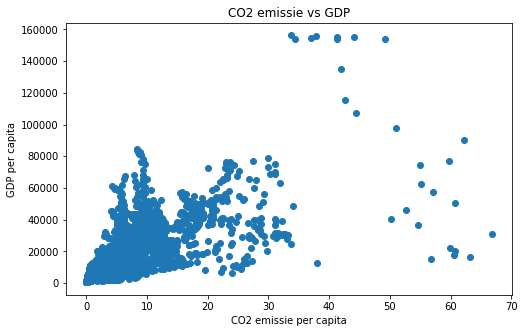

In [ ]:
# Snelle visualisatie van data
fig, ax = plt.subplots()
ax.scatter(df_co2_gdp['CO2_per_capita'], df_co2_gdp['GDP_per_capita'])
ax.set_title('CO2 emissie vs GDP')
ax.set_xlabel('CO2 emissie per capita')
ax.set_ylabel('GDP per capita')
fig.set_size_inches(8,5)

plt.show()

In [ ]:
# Bereken correlatie tussen co2 emissie en gdp
pearson_cor = pearsonr(df_co2_gdp['CO2_per_capita'], df_co2_gdp['GDP_per_capita'])
display(pearson_cor)

# Conclusie: het betreft een significante, sterk positieve correlatie wat inhoudt dat een toename in GDP samengaat met een toename in CO2 emissie (let op: een correlatie is geen oorzaak gevolg!)

(0.7259008832028186, 0.0)

## Vehicles: 0.62

In [ ]:
# Ingest vehicle data from github:
df_vehicles = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/motor-vehicle-ownership-per-1000-inhabitants.csv')

# Drop irrelevant columns
df_vehicles = df_vehicles.loc[:, ('Entity', 'Year', 'Motor vehicles per 1000 people (NationMaster (2014))')]

# Rename columns
df_vehicles.columns = ['country', 'year', 'vehicles']

df_vehicles.head()

,country,year,vehicles
0,Afghanistan,2014,28
1,Albania,2014,124
2,Algeria,2014,114
3,Angola,2014,38
4,Antigua and Barbuda,2014,230


In [ ]:
# Merge co2 and vehicle dataframes
df_co2_vehicles = pd.merge(df_co2, df_vehicles, on=['country', 'year'])

# check for default null values
df_co2_vehicles.isna().sum()

df_co2_vehicles.head(5)

,country,year,CO2_per_capita,vehicles
0,Afghanistan,2014,0.280299,28
1,Albania,2014,2.080253,124
2,Algeria,2014,3.903047,114
3,Angola,2014,0.926986,38
4,Antigua and Barbuda,2014,5.172590,230


In [ ]:
# Bereken correlatie tussen co2 emissie en aantal voertuigen
pearson_cor = pearsonr(df_co2_vehicles['CO2_per_capita'], df_co2_vehicles['vehicles'])
display(pearson_cor)

# Conclusie: het betreft een significante, sterk positieve correlatie wat inhoudt dat een toename in aantal voertuigen samengaat met een toename in CO2 emissie (let op: een correlatie is geen oorzaak gevolg!)

(0.6164785918439575, 7.45373052233549e-21)

## Energiebronnen: 0.85 (max)

In [ ]:
# Ingest data from github:
df_energy = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/per-capita-electricity-fossil-nuclear-renewables.csv')

# Only select countries
df_energy.loc[(~df_energy['Code'].isna()) & (df_energy['Entity']!='World')]

# Select relevant columns and rename relevant columns
df_energy.drop(columns=['Code'], inplace=True)
df_energy.columns = ['country', 'year', 'fossil', 'nuclear', 'renewable']

df_energy.head(5)

,country,year,fossil,nuclear,renewable
0,Afghanistan,2000,8.187080,0.0,15.862469
1,Afghanistan,2001,4.571165,0.0,25.395363
2,Afghanistan,2002,6.190400,0.0,26.666340
3,Afghanistan,2003,13.689474,0.0,27.820543
4,Afghanistan,2004,14.010625,0.0,23.775604


In [ ]:
# Merge co2 and energy dataframes
df_co2_energy = pd.merge(df_co2, df_energy, on=['country', 'year'])

# Check on null values
df_co2_energy.isna().sum()

df_co2_energy.head(5)

,country,year,CO2_per_capita,fossil,nuclear,renewable
0,Afghanistan,2000,0.053581,8.187080,0.0,15.862469
1,Afghanistan,2001,0.054300,4.571165,0.0,25.395363
2,Afghanistan,2002,0.063856,6.190400,0.0,26.666340
3,Afghanistan,2003,0.068871,13.689474,0.0,27.820543
4,Afghanistan,2004,0.052529,14.010625,0.0,23.775604


In [ ]:
# Bereken correlatie tussen co2 emissie en energiebron. Hierbij wordt rekening gehouden met default null waardes en worden 0 waardes beschouwd als onbekend)
energies = df_co2_energy.columns[3:]

for energy in energies:
  pearson_cor = pearsonr(df_co2_energy.loc[df_co2_energy[energy]>0,'CO2_per_capita'], df_co2_energy.loc[df_co2_energy[energy]>0, energy])
  print(energy)
  display(pearson_cor)

# Conclusie: voor fossiele brandstof betreft het een significante, sterk positieve correlatie  wat inhoudt dat een toename in gebruik van fossiele brandstoffen samengaat met een toename in CO2 emissie (let op: een correlatie is geen oorzaak gevolg!)
# Voor de overige energiebronnen geldt slechts een zwakke tot matige correlatie.

fossil


(0.8480224476437537, 0.0)

nuclear


(0.24091380380431598, 1.9066924886696712e-14)

renewable


(0.16596539085680392, 4.374768072803208e-28)

## Dieet: 0.47 (max)

In [ ]:
# Ingest diet data from github:
df_dieet = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/diet-animal-products.csv')

# Only include countries
df_dieet = df_dieet.loc[(~df_dieet['Code'].isna())&(df_dieet['Year']==2014)]

# Drop irrelevant columns and rename relevant columns
df_dieet.drop(columns=['Code'], inplace=True)
df_dieet.columns = ['country', 'year', 'milk', 'red_meat', 'poultry','eggs', 'seafood']

df_dieet.head(5)

,country,year,milk,red_meat,poultry,eggs,seafood
0,Afghanistan,2014,176.356164,22.739726,5.424658,4.054795,0.520548
4,Albania,2014,930.164384,102.821918,37.780822,38.273973,14.630137
8,Algeria,2014,413.863014,35.342466,18.794521,21.726027,12.054795
12,Angola,2014,41.917808,40.027397,41.315068,3.342466,72.219178
16,Antigua and Barbuda,2014,210.849315,50.465753,149.452055,8.164384,148.410959


In [ ]:
# Merge co2 and diet dataframes
df_co2_dieet = pd.merge(df_co2, df_dieet, on=['country', 'year'])

# Check for default null values
df_co2_dieet.isna().sum()

df_co2_dieet.head(5)

,country,year,CO2_per_capita,milk,red_meat,poultry,eggs,seafood
0,Afghanistan,2014,0.280299,176.356164,22.739726,5.424658,4.054795,0.520548
1,Albania,2014,2.080253,930.164384,102.821918,37.780822,38.273973,14.630137
2,Algeria,2014,3.903047,413.863014,35.342466,18.794521,21.726027,12.054795
3,Angola,2014,0.926986,41.917808,40.027397,41.315068,3.342466,72.219178
4,Antigua and Barbuda,2014,5.172590,210.849315,50.465753,149.452055,8.164384,148.410959


In [ ]:
# Bereken correlatie tussen co2 emissie en energiebron
foodtypes = df_co2_dieet.columns[3:]

for foodtype in foodtypes:
  pearson_cor = pearsonr(df_co2_dieet['CO2_per_capita'], df_co2_dieet[foodtype])
  print(foodtype)
  display(pearson_cor)

# Conclusie: voor roodvlees, gevogelte en eieren bestreft het een significante, relatief sterke correlatie. 
# Voor melk en seafood bestaat er een zwakke tot matige correlatie. 

milk


(0.3342146296773286, 7.438135939529629e-06)

red_meat


(0.45860449934361924, 2.506443071811162e-10)

poultry


(0.4697688856894047, 7.968932478674529e-11)

eggs


(0.45651138932400676, 3.0929761873186373e-10)

seafood


(0.15763234965093276, 0.03890562775349359)

## Binnenlandse vluchten: 0.25


In [ ]:
# Ingest data from github:
df_flights = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/per-capita-domestic-aviation-km.csv')

# Only include countries
df_flights = df_flights.loc[df_flights['Entity']!='World']

# Drop irrelevant columns and rename columns
df_flights.drop(columns=['Code'], inplace=True)
df_flights.columns = ['country' , 'year', 'RPKs_per_capita']

df_flights.head(5)

,country,year,RPKs_per_capita
0,Afghanistan,2018,9.385612
1,Algeria,2018,31.199312
2,Angola,2018,13.227104
3,Argentina,2018,361.476242
4,Australia,2018,3064.271133


In [ ]:
# Merge co2 and flight dataframes
df_co2_flights = pd.merge(df_co2, df_flights, on=['country', 'year'])

# Check for default null values
df_co2_flights.isna().sum()

df_co2_flights.head(5)

,country,year,CO2_per_capita,RPKs_per_capita
0,Afghanistan,2018,0.294876,9.385612
1,Algeria,2018,4.147961,31.199312
2,Angola,2018,0.728395,13.227104
3,Argentina,2018,4.066307,361.476242
4,Australia,2018,16.665200,3064.271133


In [ ]:
# Bereken correlatie tussen co2 emissie en hoeveelheid binnenlandse vluchten
pearson_cor = pearsonr(df_co2_flights['CO2_per_capita'], df_co2_flights['RPKs_per_capita'])
display(pearson_cor)

# Conclusie: het betreft een significante maar matige correlatie

(0.24627775658632378, 0.011324519633336971)

# Conclusie vraag 1:
Uit de analyse blijkt dat de hoeveelheid **fossiele brandstoffen** (0.85) en de hoogte van het **GDP** (0.73) de grootste voorspellers zijn voor een hoge CO2 emissie per capita. Daarnaast blijkt ook het aantal voertuigen een redelijke voorspeller te zijn. 

Let op: dit zijn de grootste voorspellers binnen de geteste factoren in deze analyse. 

# **2: Biggest strides in decreasing CO2 output**
Vraag 2: Which countries are making the biggest strides in decreasing CO2 output?

In [ ]:
# Om deze vraag te beantwoorden wordt gebruik gemaakt van een dataset met totale CO2 uitstoot per land per jaar en een dataset met de populatie per land per jaar.

# De populatiegrootte wordt gebruikt om de CO2 uitstoot per capita te berekenen. Het is belangrijk om deze relatieve uitstoot te berekenen omdat een afname 
# in totale CO2 uitstoot een grotere betekenis heeft bij een stijgende populatiegrootte dan bij een dalende (of minder hard stijgende) populatiegrootte en vice versa.

In [ ]:
# Ingest CO2 emissions data from github:
df_co2 = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/annual-co2-emissions-per-country.csv')

# Only select countries:
df_co2 = df_co2.loc[~(df_co2['Code'].isna())& (df_co2['Entity']!= 'World')]

# Drop irrelevant columns:
df_co2.drop(columns=['Code'], inplace=True)

# Rename columns:
df_co2.rename(columns={'Entity':'country', 'Year':'year', 'Annual CO₂ emissions':'CO2_emission'}, inplace=True)

df_co2.head(5)

,country,year,CO2_emission
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


In [ ]:
#### Jaartallen selecteren ###

# Onderzoek wat het meest recente jaar is waarvan data beschikbaar is:
df_co2['year'].max()  # 2021

# Onderzoek welke jaartallen het meest voorkomen in de data:
df_co2['year'].value_counts().head(30) # van 2002 t/m 2021 evenveel landen per jaartal (let op: betekent niet dat dit dezelfde landen zijn!)

# We zullen het jaar 2011 en 2021 selecteren om het verschil in 10 jaar te bekijken:
df_co2 = df_co2.loc[(df_co2['year']==2011) | (df_co2['year']==2021)]

# Controleren of elk land voor beide jaartallen data heeft:
df_co2.isnull().sum()  # Geen default null waardes
df_co2['CO2_emission'].value_counts() # Geen opvallende waardes

df_co2.head(10)

,country,year,CO2_emission
62,Afghanistan,2011,11838316.0
72,Afghanistan,2021,11874211.0
595,Albania,2011,5314676.0
605,Albania,2021,4619109.0
701,Algeria,2011,119807544.0
711,Algeria,2021,176269070.0
973,Andorra,2011,490976.0
983,Andorra,2021,452888.0
1045,Angola,2011,30329742.0
1055,Angola,2021,21362716.0


In [ ]:
# Ingest population data from github:
df_pop = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/population.csv')

# Only select countries:
df_pop = df_pop.loc[(~df_pop['Code'].isna()) & (df_pop['Entity']!='World')]

# Rename columns and drop irrelevant columns:
df_pop.rename(columns={'Entity':'country', 'Year':'year', 'Population (historical estimates)':'population'}, inplace=True)
df_pop = df_pop.loc[:, ('country', 'year', 'population')]

# Select relevant years:
df_pop = df_pop.loc[(df_pop['year']==2011)|(df_pop['year']==2021)]

df_pop.head(10)

,country,year,population
248,Afghanistan,2011,29249156
258,Afghanistan,2021,40099460
766,Albania,2011,2900660
776,Albania,2021,2854710
1025,Algeria,2011,36543548
1035,Algeria,2021,44177964
1139,American Samoa,2011,54334
1149,American Samoa,2021,45056
1398,Andorra,2011,70587
1408,Andorra,2021,79057


In [ ]:
# Controleer of elk land voor beide jaartallen data bevat:
df_pop['country'].value_counts()  # Svalbard and Jan Mayen & Netherlands Antilles slechts een van beide jaren data. Echter: deze landen komen niet voor in de df_co2 dus niet relevant!

Afghanistan               2
Panama                    2
Nicaragua                 2
Niger                     2
Nigeria                   2
                         ..
Guam                      2
Guatemala                 2
Guernsey                  2
Svalbard and Jan Mayen    1
Netherlands Antilles      1
Name: country, Length: 238, dtype: int64

In [ ]:
# Merge de twee datasets:
df_co2_pop = pd.merge(df_co2, df_pop, on=['country','year'])

# Create new column: relative CO2 output (CO2 per capita)
df_co2_pop['relative_CO2'] = df_co2_pop['CO2_emission'] / df_co2_pop['population']

df_co2_pop.head(10)

,country,year,CO2_emission,population,relative_CO2
0,Afghanistan,2011,11838316.0,29249156,0.404740
1,Afghanistan,2021,11874211.0,40099460,0.296119
2,Albania,2011,5314676.0,2900660,1.832230
3,Albania,2021,4619109.0,2854710,1.618066
4,Algeria,2011,119807544.0,36543548,3.278487
5,Algeria,2021,176269070.0,44177964,3.989977
6,Andorra,2011,490976.0,70587,6.955615
7,Andorra,2021,452888.0,79057,5.728626
8,Angola,2011,30329742.0,24259120,1.250241
9,Angola,2021,21362716.0,34503776,0.619141


In [ ]:
# Pivot table:
df_co2_rel = pd.pivot_table(df_co2_pop, index='country', values='relative_CO2', columns='year').reset_index()

# Create new column: difference in relative CO2 output between 2011 vs 2021
df_co2_rel['diff_2011_2021'] = df_co2_rel[2021] - df_co2_rel[2011]

df_co2_rel.head(10)

year,country,2011,2021,diff_2011_2021
0,Afghanistan,0.404740,0.296119,-0.108621
1,Albania,1.832230,1.618066,-0.214164
2,Algeria,3.278487,3.989977,0.711490
3,Andorra,6.955615,5.728626,-1.226989
4,Angola,1.250241,0.619141,-0.631099
5,Anguilla,10.693407,9.173205,-1.520202
6,Antigua and Barbuda,5.110653,5.027352,-0.083301
7,Argentina,4.582621,4.117966,-0.464654
8,Armenia,1.696451,2.438594,0.742143
9,Aruba,24.666825,8.054269,-16.612555


In [ ]:
### Top 5 landen waarbij de CO2 uitstoot van 2011 naar 2021 het meest is gedaald ###
df_co2_rel.sort_values(by=['diff_2011_2021']).head(5)

year,country,2011,2021,diff_2011_2021
49,Curacao,31.722794,9.686285,-22.036509
9,Aruba,24.666825,8.054269,-16.612555
199,Trinidad and Tobago,32.872818,23.677477,-9.195341
159,Qatar,44.146305,35.587305,-8.559001
113,Luxembourg,21.425722,13.067672,-8.358049


# Conclusie vraag 2:
De landen die de grootste stappen hebben gemaakt in de vermindering van de CO2 uitstoot tussen 2011 en 2021 zijn:
**Curacao, Aruba, Trinidad and Tobago, Qatar en Luxembourg**


# **3: Best future price for non-fossil fuel energy**
which non-fossil fuel energy technology will have the best price in the future?

In [ ]:
# Ingest energy costs data from github:
df_future = pd.read_csv('https://github.com/DeRomy/Winc-M7-Assignment-CO2_emissions/raw/main/levelized-cost-of-energy.csv')

# Select data from the world:
df_future = df_future.loc[df_future['Entity']=='World']

# Drop irrelevant columns:
df_future.drop(columns=['Code'], inplace=True)

# Rename columns:
df_future.columns = ['entity', 'year', 'bioenergy', 'geothermal', 'offshore wind', 'solar photovoltaic', 'concentrated solar power', 'hydropower', 'onshore wind']

# Order by year
df_future = df_future.sort_values(by='year')

df_future

,entity,year,bioenergy,geothermal,offshore wind,solar photovoltaic,concentrated solar power,hydropower,onshore wind
469,World,1983,NaN,NaN,NaN,NaN,NaN,NaN,0.327851
470,World,1984,NaN,NaN,NaN,NaN,NaN,NaN,0.320074
471,World,1985,NaN,NaN,NaN,NaN,NaN,NaN,0.297221
472,World,1986,NaN,NaN,NaN,NaN,NaN,NaN,0.264194
473,World,1987,NaN,NaN,NaN,NaN,NaN,NaN,0.256420
474,World,1988,NaN,NaN,NaN,NaN,NaN,NaN,0.212157
475,World,1989,NaN,NaN,NaN,NaN,NaN,NaN,0.196435
476,World,1990,NaN,NaN,NaN,NaN,NaN,NaN,0.208688
477,World,1991,NaN,NaN,NaN,NaN,NaN,NaN,0.200317
478,World,1992,NaN,NaN,NaN,NaN,NaN,NaN,0.200653


slope geothermal: [6.91564209e-05]
slope offshore wind: [-0.00374143]
slope solar photovoltaic: [-0.02916773]
slope concentrated solar power: [-0.02177496]
slope hydropower: [0.00082191]
slope onshore wind: [-0.00661211]


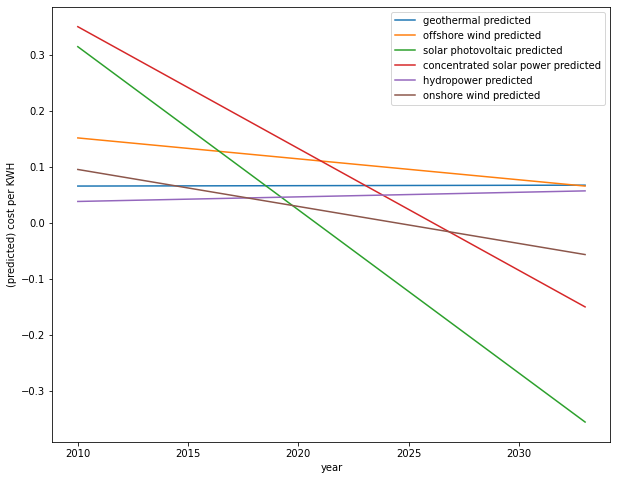

In [ ]:
# Create linear regression models and plot

sources = df_future.columns[3:]

# Create figure:
fig, ax = plt.subplots()

for source in sources:
    
  # x and y from data
  x = np.array(df_future.loc[~df_future[source].isna(),'year']).reshape((-1, 1))
  y = np.array(df_future.loc[~df_future[source].isna(), source])

  # create model:
  model = LinearRegression().fit(x, y)

  # predict y values for x values between 2010 and 2034
  x_pred = np.array(range(2010,2034)).reshape((-1,1))
  y_pred = model.predict(x_pred)

  # Plot regression lines
  # ax.scatter(x, y, label=source)
  ax.plot(x_pred, y_pred, label=str(source)+" predicted")

  # Show slopes
  print(f"slope {source}: {model.coef_}")

ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('year')
ax.set_ylabel('(predicted) cost per KWH')
fig.set_size_inches(10,8)

# Conclusie: uit dit model blijkt dat de kosten voor solar photovoltaic het meest dalen (0.029 per jaar) 

# Conclusie vraag 3:
Uit de plot met de lineaire regressie lijnen blijkt dat de **solar photovoltaic** energiebron het meeste daalt in de komende 10 jaar en dus mogelijk de beste prijs zal hebben in de toekomst.